# Homework 4

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
def Vander(x,K):
    phi=np.zeros((x.shape[0],K))
    for i in range(K):
        phi[:,i]=x**i
    return phi

def average_abs_error(theta,Testdata):
    Xtest=Testdata[0]
    Ytest=Testdata[1]
    return np.linalg.norm(np.vander(Xtest,len(theta))@theta-Ytest,2)*(1/len(Xtest))

def split_data(X,Y,NTrain):
    index=np.linspace(0,len(Y)-1,len(Y),dtype=int)
    np.random.shuffle(index)
    X,Y =X[index],Y[index]
    Xtrain,Ytrain=X[:NTrain], Y[:NTrain]
    Xtest,Ytest=X[NTrain:],Y[NTrain:]
    return Xtrain,Ytrain ,Xtest,Ytest

def ftheta_map(data,k,lamda):
    X,Y=data[0],data[1]
    Phi=np.vander(X,k)
    theta_map_k=np.linalg.solve(Phi.T@Phi + lamda*np.identity(k), Phi.T@Y)
    return theta_map_k


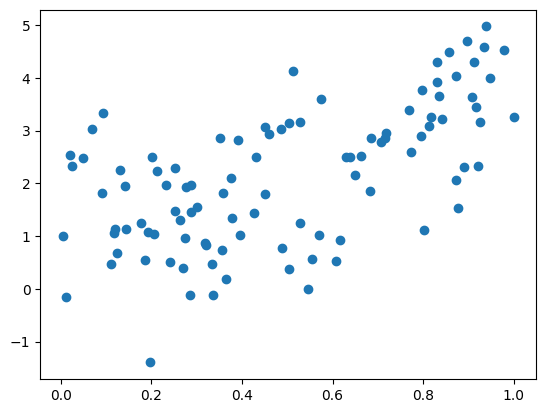

In [86]:
N=100
K=4
theta=np.ones((K,))
a,b=0,1
X=np.random.uniform(low=a,high=b,size=N)
variance=1
Phi=np.vander(X,K)
Y=Phi@theta+np.random.normal(0,variance,size=N)
plt.scatter(X,Y);


### Part 3

K=  3


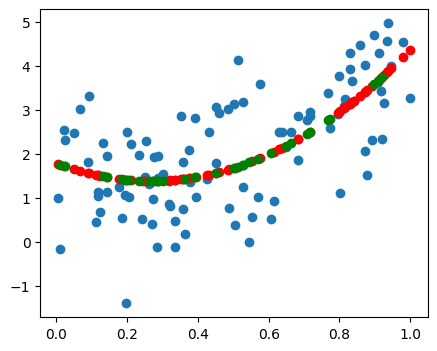

K=  4


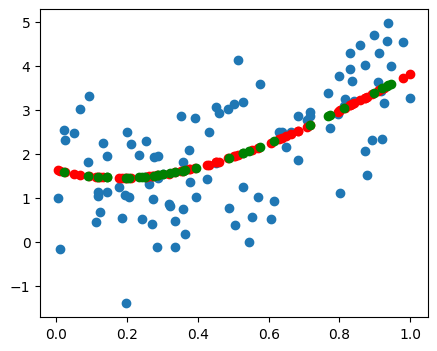

K=  5


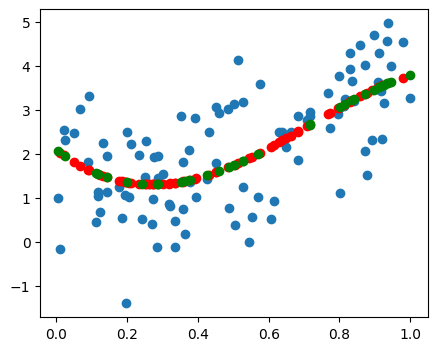

K=  10


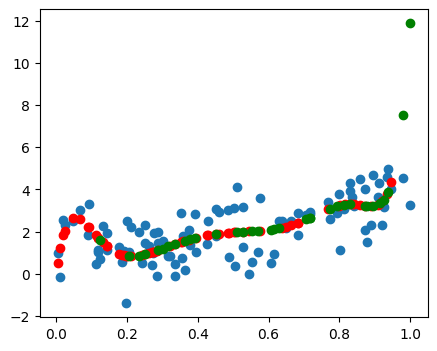

K=  20


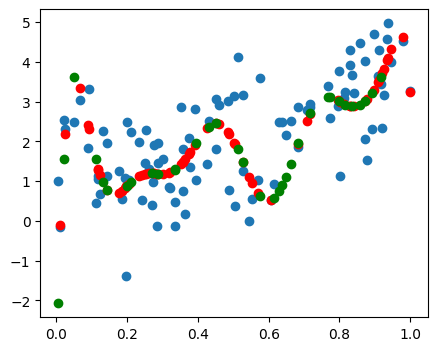

K=  30


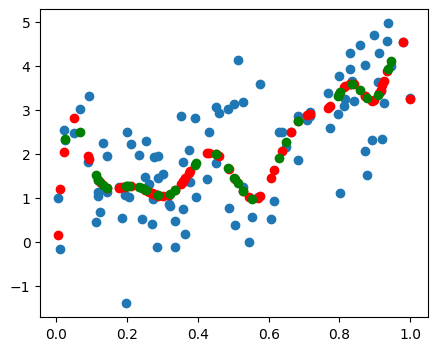

In [87]:
K_vec=[3,4,5,10,20,30]
for k in K_vec:
    plt.figure(figsize=(5,4))
    print("K= ",k)
    plt.scatter(X,Y);#plot the data
    Xtrain,Ytrain ,Xtest,Ytest=split_data(X,Y,int(N-N/3))
    Phi=np.vander(Xtrain,k)
    theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
    Y_approx_train=Phi@theta_MLE
    plt.scatter(Xtrain,Y_approx_train, c="red");
    Phi=np.vander(Xtest,k)#plot the test data
    Y_approx_test=Phi@theta_MLE
    #print(Xtest.shape,Y_approx_test.shape)
    plt.scatter(Xtest,Y_approx_test,c="green")  
    plt.show()

In [88]:
Xtrain,Ytrain ,Xtest,Ytest=split_data(X,Y,int(N-N/3))
Xtest=np.random.uniform(low=a,high=b,size=len(Xtest))

### Quesito 6

K= 1
TRAIN abs err K=1 = 0.14491991542552468
TEST abs error K=1 = 0.22619076638791621
TEST abs err theta male for K=1 and λ=[1, 0.1, 0.01] is = 0.2223889375974733
K= 1
TRAIN abs err K=1 = 0.14491991542552468
TEST abs error K=1 = 0.28612459489359404
TEST abs err theta male for K=1 and λ=[1, 0.1, 0.01] is = 0.28575676101746733
K= 1
TRAIN abs err K=1 = 0.14491991542552468
TEST abs error K=1 = 0.2135019523198141
TEST abs err theta male for K=1 and λ=[1, 0.1, 0.01] is = 0.21345864607827592


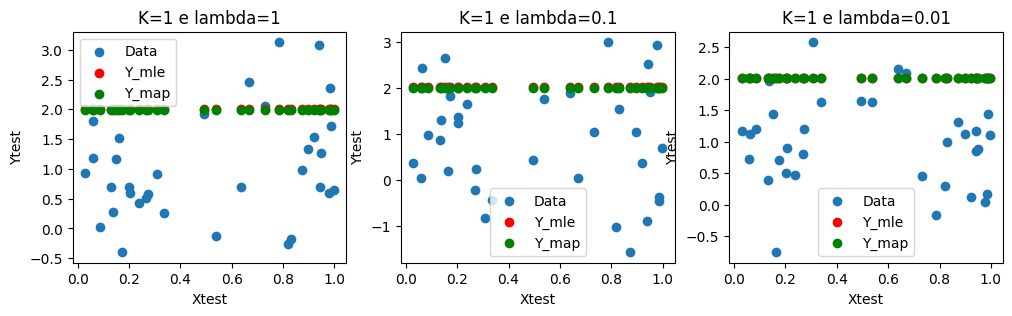

********************************************************************
K= 2
TRAIN abs err K=2 = 0.12545814253024548
TEST abs error K=2 = 0.23164363334602314
TEST abs err theta male for K=2 and λ=[1, 0.1, 0.01] is = 0.2217022024414722
K= 2
TRAIN abs err K=2 = 0.12545814253024548
TEST abs error K=2 = 0.19581300831718615
TEST abs err theta male for K=2 and λ=[1, 0.1, 0.01] is = 0.19545235293247376
K= 2
TRAIN abs err K=2 = 0.12545814253024548
TEST abs error K=2 = 0.18582912839030818
TEST abs err theta male for K=2 and λ=[1, 0.1, 0.01] is = 0.18574089140808844


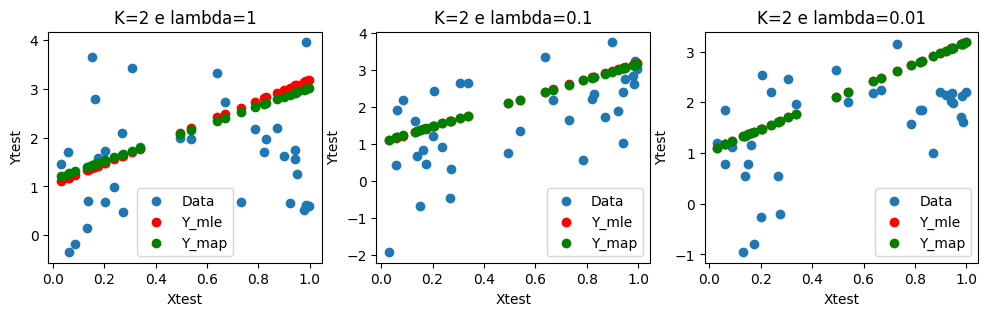

********************************************************************
K= 4
TRAIN abs err K=4 = 0.11599325673360905
TEST abs error K=4 = 0.18818498425969626
TEST abs err theta male for K=4 and λ=[1, 0.1, 0.01] is = 0.18431430358916753
K= 4
TRAIN abs err K=4 = 0.11599325673360905
TEST abs error K=4 = 0.1837747808878155
TEST abs err theta male for K=4 and λ=[1, 0.1, 0.01] is = 0.1786857941561815
K= 4
TRAIN abs err K=4 = 0.11599325673360905
TEST abs error K=4 = 0.18827519766493686
TEST abs err theta male for K=4 and λ=[1, 0.1, 0.01] is = 0.1865513025507366


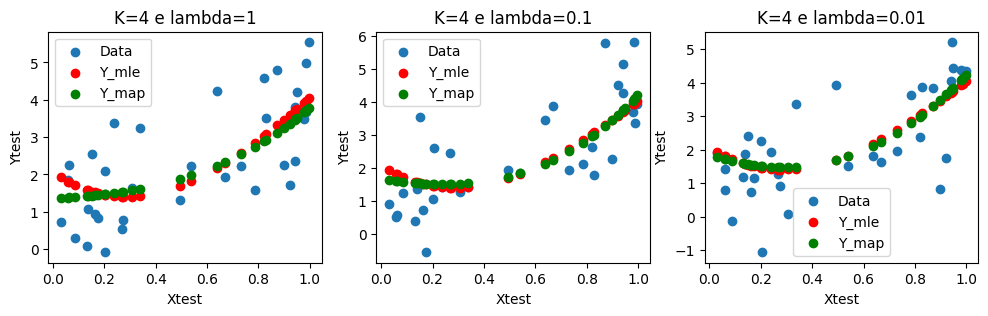

********************************************************************
K= 5
TRAIN abs err K=5 = 0.11599318772807071
TEST abs error K=5 = 0.17359923373504102
TEST abs err theta male for K=5 and λ=[1, 0.1, 0.01] is = 0.1830467503250028
K= 5
TRAIN abs err K=5 = 0.11599318772807071
TEST abs error K=5 = 0.21011012064226683
TEST abs err theta male for K=5 and λ=[1, 0.1, 0.01] is = 0.20389950377073413
K= 5
TRAIN abs err K=5 = 0.11599318772807071
TEST abs error K=5 = 0.19052675591651083
TEST abs err theta male for K=5 and λ=[1, 0.1, 0.01] is = 0.18974143678192015


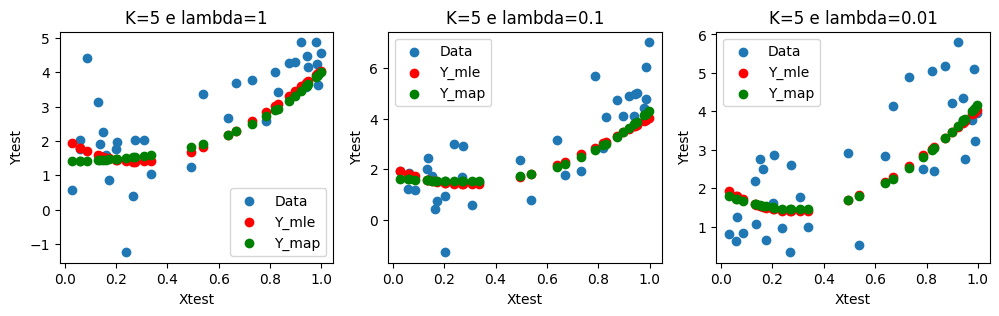

********************************************************************
K= 10
TRAIN abs err K=10 = 0.1083058986790143
TEST abs error K=10 = 0.4184190582117091
TEST abs err theta male for K=10 and λ=[1, 0.1, 0.01] is = 0.4239364121685089
K= 10
TRAIN abs err K=10 = 0.1083058986790143
TEST abs error K=10 = 0.4424718321314471
TEST abs err theta male for K=10 and λ=[1, 0.1, 0.01] is = 0.4772855734778768
K= 10
TRAIN abs err K=10 = 0.1083058986790143
TEST abs error K=10 = 0.4964875404194087
TEST abs err theta male for K=10 and λ=[1, 0.1, 0.01] is = 0.5183039309588244


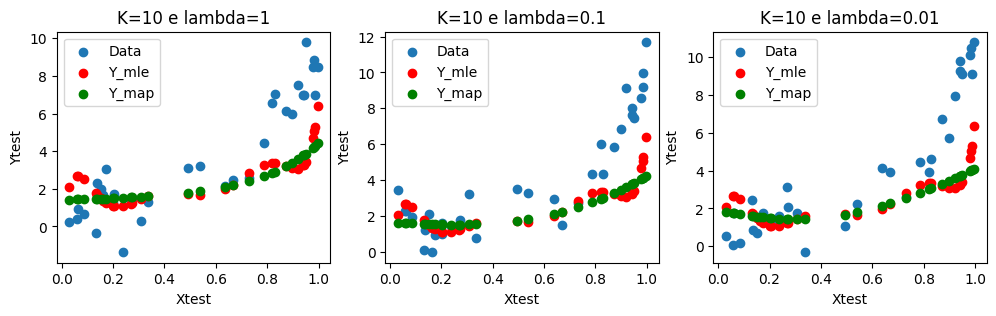

********************************************************************
K= 20
TRAIN abs err K=20 = 0.09953306205488702
TEST abs error K=20 = 1.556867364018321
TEST abs err theta male for K=20 and λ=[1, 0.1, 0.01] is = 0.9601505979613066
K= 20
TRAIN abs err K=20 = 0.09953306205488702
TEST abs error K=20 = 1.513215899692211
TEST abs err theta male for K=20 and λ=[1, 0.1, 0.01] is = 0.9762098920331205
K= 20
TRAIN abs err K=20 = 0.09953306205488702
TEST abs error K=20 = 1.5081646196072898
TEST abs err theta male for K=20 and λ=[1, 0.1, 0.01] is = 0.9411614693642729


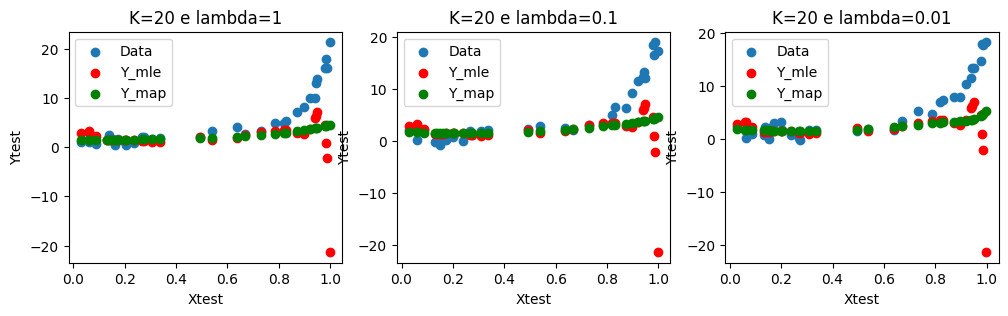

********************************************************************
K= 100
TRAIN abs err K=100 = 0.09225728251021459
TEST abs error K=100 = 6735.0350495605
TEST abs err theta male for K=100 and λ=[1, 0.1, 0.01] is = 3.4985027348827815
K= 100
TRAIN abs err K=100 = 0.09225728251021459
TEST abs error K=100 = 6735.051438934087
TEST abs err theta male for K=100 and λ=[1, 0.1, 0.01] is = 3.4154222413016724
K= 100
TRAIN abs err K=100 = 0.09225728251021459
TEST abs error K=100 = 6735.064081713196
TEST abs err theta male for K=100 and λ=[1, 0.1, 0.01] is = 3.534829722915188


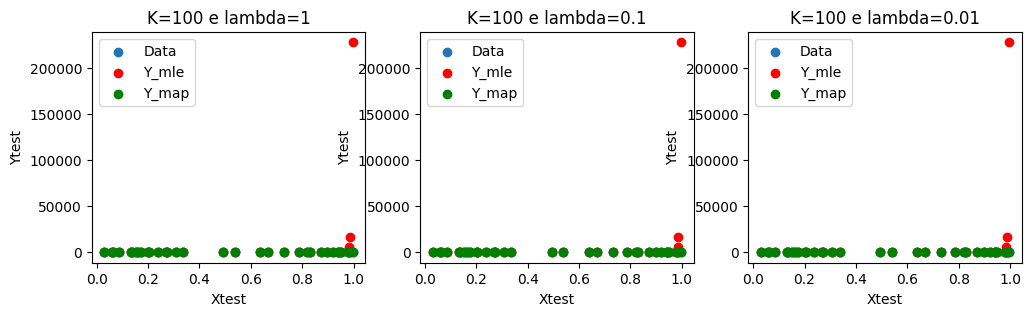

********************************************************************


In [89]:
K_vec=[1,2,4,5,10,20,100]
lmda=[1,0.1,0.01]
for k in K_vec:
    plt.figure(figsize=(12,3))
    for l in range(len(lmda)):
        plt.subplot(1,len(lmda),l+1)
        plt.title(f"K={k} e lambda={lmda[l]}")
        plt.xlabel("Xtest")
        plt.ylabel("Ytest")
        Phi=np.vander(Xtrain,k)
        theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
        
        
        
        variance=1
        Phi=np.vander(Xtest,k)
        theta=np.ones((k,))
        Y_approx_test=Phi@theta_MLE
        
        Ytest=Phi@theta+np.random.normal(0,variance,size=len(Xtest))
        theta_map=ftheta_map((Xtrain,Ytrain),k,lmda[l])
        Y_approx_map=Phi@theta_map
        #print(theta.shape)
        #print(theta_MLE.shape)
        #print(theta_map.shape)
        print("K=",k)
        D=plt.scatter(Xtest,Ytest)
        D_mle=plt.scatter(Xtest,Y_approx_test,c="red")
        D_map=plt.scatter(Xtest,Y_approx_map,c="green")
        plt.legend((D,D_mle,D_map),("Data","Y_mle","Y_map"))
        print(f"TRAIN abs err K={k} =",average_abs_error(theta_MLE,(Xtrain,Ytrain)))
        print(f"TEST abs error K={k} =", average_abs_error(theta_MLE,(Xtest,Ytest)))
        print(f"TEST abs err theta male for K={k} and λ={lmda} is =",
            average_abs_error(theta_map,(Xtest,Ytest)))
    plt.show()
    print("********************************************************************")
    
 

### Quesito 7

In [90]:
K_greater=[5,10,20,100]
lbmda=[10,1,0.1,0.01]
for k in K_greater:
    print(f"K={k}")
    for l in range(len(lbmda)):
        Phi=np.vander(Xtrain,k)
        theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
        Phi=np.vander(Xtest,k)
        Y_mle=Phi@theta_MLE#it's on the test set
        theta_map=ftheta_map((Xtrain,Ytrain),k,lbmda[l])
        Y_map=Phi@theta_map# it's on the test set
        MLE_err=average_abs_error(theta_MLE,(Xtest,Ytest))
        MAP_err=average_abs_error(theta_map,(Xtest,Ytest))
        print(f"MLE error",MLE_err) if l==0 else None
        print(f"MAP err for λ={lbmda[l]} =",MAP_err)
    print("***************")   
        

K=5
MLE error 3.527188977417982
MAP err for λ=10 = 3.575067641055025
MAP err for λ=1 = 3.5319548932497273
MAP err for λ=0.1 = 3.5131408526260777
MAP err for λ=0.01 = 3.5209120910913945
***************
K=10
MLE error 3.448318439712191
MAP err for λ=10 = 3.5404273228803675
MAP err for λ=1 = 3.5088319718082954
MAP err for λ=0.1 = 3.518029378594529
MAP err for λ=0.01 = 3.5235768100759324
***************
K=20
MLE error 4.171886233641795
MAP err for λ=10 = 3.518330209999917
MAP err for λ=1 = 3.5032852563623917
MAP err for λ=0.1 = 3.506605981346666
MAP err for λ=0.01 = 3.484539489770145
***************
K=100
MLE error 6735.064081713196
MAP err for λ=10 = 3.496819886627096
MAP err for λ=1 = 3.4740648229996154
MAP err for λ=0.1 = 3.423133967034486
MAP err for λ=0.01 = 3.534829722915188
***************


### Quesito 9

In [100]:
K_greater=[5,10,20,100]

def rel_error(theta):
    return np.linalg.norm(theta-np.concatenate((np.ones((K,)),np.zeros((len(theta)-K,))),axis=0),2)/np.linalg.norm(np.ones((K,)),2)
for k in K_greater:
    None